<a href="https://colab.research.google.com/github/HRJ369/CL329/blob/main/CL329_coding_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

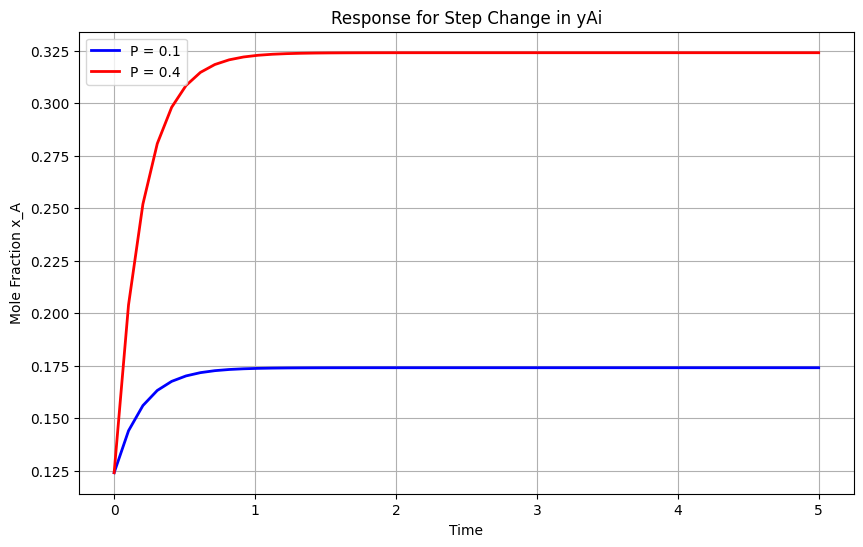

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def solve_dynamic_equation(P, color, label):
    # Parameters for the system
    rho = 0.02  # Density of the fluid (kg/m^3)
    V = 10     # Volume of the system (m^3)
    F = 1     # Liquid flow rate (m^3/s)
    G = 0.5     # Gas flow rate (m^3/s)
    yAi_steady = 0.4  # Steady-state mole fraction of A in the entering gas
    yA_steady = 0.152  # Steady-state mole fraction of A in the leaving gas
    xA_steady = 0.124   # Steady-state mole fraction of A in the liquid phase

    # Time span for the simulation
    t_span = np.linspace(0, 5, 50)  # Adjust the time range if needed

    # Step change in yAi with magnitude P
    yAi_step = yAi_steady + P

    # Define the ODE function
    def dynamic_ode(xA, t):
        dxA_dt = (-F * xA + G * yAi_step - G * yA_steady) / (rho * V)
        return dxA_dt

    # Solve the ODE using odeint
    # Initial condition based on steady state
    xA0 = xA_steady
    xA_solution = odeint(dynamic_ode, xA0, t_span)

    # Plot the results
    plt.plot(t_span, xA_solution, color, linewidth=2, label=label)

# Plotting both responses on the same figure
plt.figure(figsize=(10, 6))

# Solve and plot for P = 0.1
solve_dynamic_equation(0.1, 'b-', 'P = 0.1')

# Solve and plot for P = 0.4
solve_dynamic_equation(0.4, 'r-', 'P = 0.4')

# Adding plot details
plt.xlabel('Time')
plt.ylabel('Mole Fraction x_A')
plt.title('Response for Step Change in yAi')
plt.legend()
plt.grid()
plt.show()


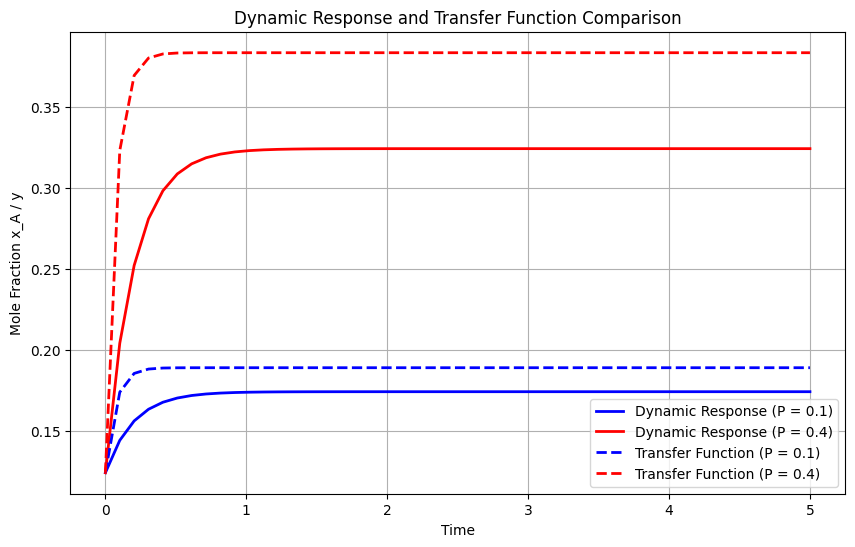

In [24]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def solve_dynamic_equation(P, color, label):
    # Parameters for the system
    rho = 0.02  # Density of the fluid (kg/m^3)
    V = 10      # Volume of the system (m^3)
    F = 1       # Liquid flow rate (m^3/s)
    G = 0.5     # Gas flow rate (m^3/s)
    yAi_steady = 0.4  # Steady-state mole fraction of A in the entering gas
    yA_steady = 0.152  # Steady-state mole fraction of A in the leaving gas
    xA_steady = 0.124   # Steady-state mole fraction of A in the liquid phase

    # Time span for the simulation
    t_span = np.linspace(0, 5, 50)  # Adjust the time range if needed

    # Step change in yAi with magnitude P
    yAi_step = yAi_steady + P

    # Define the ODE function
    def dynamic_ode(xA, t):
        dxA_dt = (-F * xA + G * yAi_step - G *yA_steady) / (rho * V)
        return dxA_dt

    # Solve the ODE using odeint
    # Initial condition based on steady state
    xA0 = 0.124
    xA_solution = odeint(dynamic_ode, xA0, t_span)

    #y plot
    yA_solution = 80 * xA_solution**3
    # Plot the results
    plt.plot(t_span, xA_solution, color, linewidth=2, label=label)

# Plotting both responses on the same figure
plt.figure(figsize=(10, 6))

# Solve and plot for P = 0.1
solve_dynamic_equation(0.1, 'b-', 'Dynamic Response (P = 0.1)')

# Solve and plot for P = 0.4
solve_dynamic_equation(0.4, 'r-', 'Dynamic Response (P = 0.4)')

# Add the additional equations y = P * 0.648 * (1 - e^(-t/0.07))
t_span = np.linspace(0, 5, 50)  # Time span for the equations
P_values = [0.1, 0.4]
colors = ['b--', 'r--']  # Different line styles for the equations

for P, color in zip(P_values, colors):
    y_equation = P * 0.648 * (1 - np.exp(-t_span / 0.07)) +0.124
    plt.plot(t_span, y_equation, color, linewidth=2, label=f'Transfer Function (P = {P})')

# Adding plot details
plt.xlabel('Time')
plt.ylabel('Mole Fraction x_A / y')
plt.title('Dynamic Response and Transfer Function Comparison')
plt.legend()
plt.grid()
plt.show()


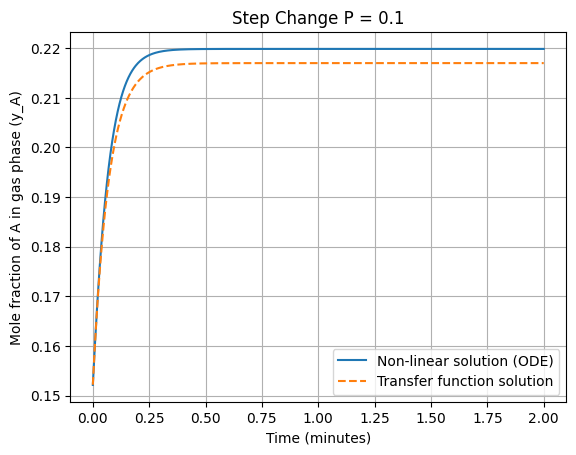

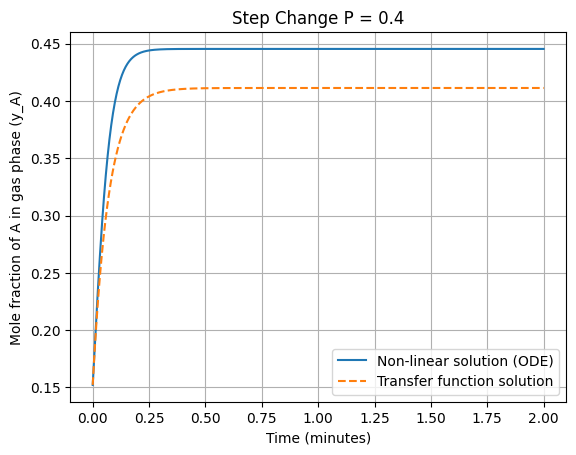

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


'''We have solved this question considering the system was at steady state before changing Ya,i by P'''
# Constants
rho = 0.02  # mol/L
V = 10      # Reactor volume in L
F = 1       # Liquid molar flow rate (mol/min)
G = 0.5     # Gas molar flow rate (mol/min)
keq = 80    # Equilibrium constant
yai_initial = 0.4   # Initial inlet mole fraction of A in gas phase (steady state)
xa_steady = 0.1239  # Steady state value of xa

# Function to represent the non-linear ODE system
def absorption_ode(t, xa, P):
    # yAi changes by step P at t = 0
    yai = yai_initial + P  # Inlet mole fraction with the step change applied
    # yA as a function of xA (non-linear relationship)
    ya = keq * xa**3
    # Differential equation: d(xa)/dt
    dxa_dt = (-F * xa + G * (yai - ya)) / (rho * V)
    return dxa_dt

# Function for the transfer function approach solution
def transfer_function_solution(t, P):
    return P * 0.648 * (1 - np.exp(-t / 0.07)) + 0.1522 #adding 0.1522 as we are taking system to be in steady state initially ie at t=0

# Initial condition and time span for the ODE solver
xa0 = xa_steady  # Initial condition (steady state value of xa)
t_span = (0, 2)  # Time span for integration (minutes)
t_eval = np.linspace(0, 2, 1000)  # Time points for evaluation

# Step changes in yAi
P_values = [0.1, 0.4]

for P in P_values:
    # Solve the non-linear ODE with the step change in yAi
    sol = solve_ivp(absorption_ode, t_span, [xa0], args=(P,), t_eval=t_eval, method='LSODA', rtol=1e-8, atol=1e-8)


    # Get xa(t) and compute ya(t) from xa(t)
    xa_sol = sol.y[0]
    ya_sol = keq * xa_sol**3

    # Compute the transfer function solution
    ya_transfer = transfer_function_solution(t_eval, P)

    # Plot the results
    plt.figure()
    plt.plot(t_eval, ya_sol, label='Non-linear solution (ODE)')
    plt.plot(t_eval, ya_transfer, label='Transfer function solution', linestyle='--')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Mole fraction of A in gas phase (y_A)')
    plt.title(f'Step Change P = {P}')
    plt.legend()
    plt.grid(True)
    plt.show()

Enter the value of Kc: 100
Enter the value of tau(l): 0.02


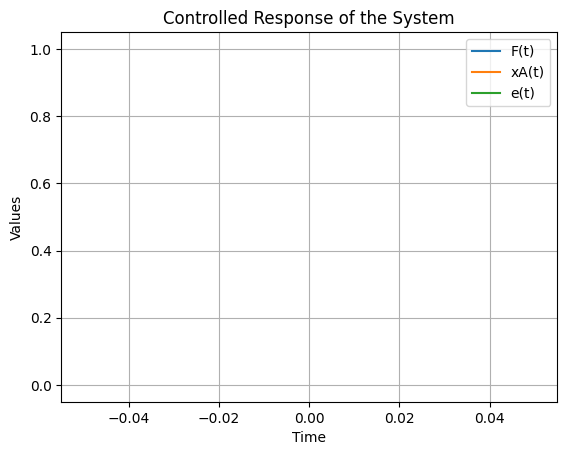

In [28]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def coupled_odes(t, y, Kc, tau_l, P):
    F, xA, e = y
    G = 0.5  # Define G based on your system
    rho = 0.02  # Define density based on your system
    V = 10  # Define volume based on your system
    Keq = 80  # Define equilibrium constant based on your system

    yA1 = 0.4 + P  # Calculate yA1

    # Define the equations

    dxA_dt = (-F * xA + G * (yA1 - Keq * xA**3)) / (rho * V)
    de_dt = -3 * Keq * xA**2 * dxA_dt
    dF_dt = Kc * de_dt + (Kc / tau_l) * de_dt


    return [dF_dt, dxA_dt, de_dt]

# Input values for Kc and tau_l
Kc = float(input("Enter the value of Kc: "))
tau_l = float(input("Enter the value of tau(l): "))

# Initial conditions
F0 = 1  # Initial condition for F
xA0 = 0.124  # Initial condition for xA
e0 = 0.0  # Initial condition for e
y0 = [F0, xA0, e0]

# Time span for the simulation
t_span = (0, 10)  # Adjust as needed
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Solve the ODEs
solution = solve_ivp(coupled_odes, t_span, y0, args=(Kc, tau_l, 0.1), t_eval=t_eval)

# Plot the results
plt.figure()
plt.plot(solution.t, solution.y[0], label='F(t)')
plt.plot(solution.t, solution.y[1], label='xA(t)')
plt.plot(solution.t, solution.y[2], label='e(t)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Controlled Response of the System')
plt.legend()
plt.grid()
plt.show()
